## Bank Customer Churn Rate

* **Problem Statement:**
    * Marketing costs to acquire new customers are high. Therefore, it is important to retain customers so that the initial investment is not wasted.
  
* **Objective:**
    * To reduce cost to acquire new customer.
    * To predict whether customer will churn or not.



### Importing Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Load Data

In [94]:
df = pd.read_csv('Churn_Modelling.csv')

In [95]:
df.shape

(10000, 14)

In [96]:
df.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [97]:
## Drioping Unwanted columns

In [98]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1 )

In [99]:
df.shape

(10000, 11)

In [100]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Checking Missing Values

In [102]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [103]:
# No Missing Values present in Dataset

### Drop Duplicates

In [104]:
df.shape

(10000, 11)

In [105]:
### Drop Duplicates
df = df.drop_duplicates()
df.shape

(10000, 11)

In [106]:
### Drop Null Rows
df = df.dropna()
df.shape

(10000, 11)

In [107]:
# No Duplicates row and Null row available

### Count of Unique Value for each variable

In [108]:
var_uniq_count = []
columns = df.columns
counter = 1

for col in columns:
    x = len(df[col].unique())
    var_uniq_count.append(x)
    counter += 1

df_uniq_values = pd.DataFrame({'variable': columns, 'uniq_Values': var_uniq_count})

df_uniq_values

variable  uniq_Values
0       CreditScore          460
1         Geography            3
2            Gender            2
3               Age           70
4            Tenure           11
5           Balance         6382
6     NumOfProducts            4
7         HasCrCard            2
8    IsActiveMember            2
9   EstimatedSalary         9999
10           Exited            2

In [109]:
# No redundant variable found

### Frequency table

In [110]:
def frequency_table(x, df):
    freq = df[x].value_counts()
    return(freq)

In [111]:
# Study the frequency table for each column (except the first two, as those are identifiers)
for col in columns[3:]:
    print ("\n\n----------------") 
    print (col)
    print(frequency_table(col,df))



----------------
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


----------------
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


----------------
Balance
0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
             ... 
183555.24       1
137648.41       1
112689.95       1
115465.28       1
74681.90        1
Name: Balance, Length: 6382, dtype: int64


----------------
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


----------------
HasCrCard
1    7055
0    2945
Name: HasCrCard, dtype: int64


----------------
IsActiveMember
1    5151
0    4849
Name: IsActiveMember, dtype: int64


----------------
EstimatedSalary
24924.92     2
109029.72    1
182025.95    1
82820.85     1
30314.04     1
     

In [112]:
# No Highly Imbalanced variable found 

### Data Analysis

### Univaiate Analysis

Text(0.5, 1.0, 'EstimatedSalary')

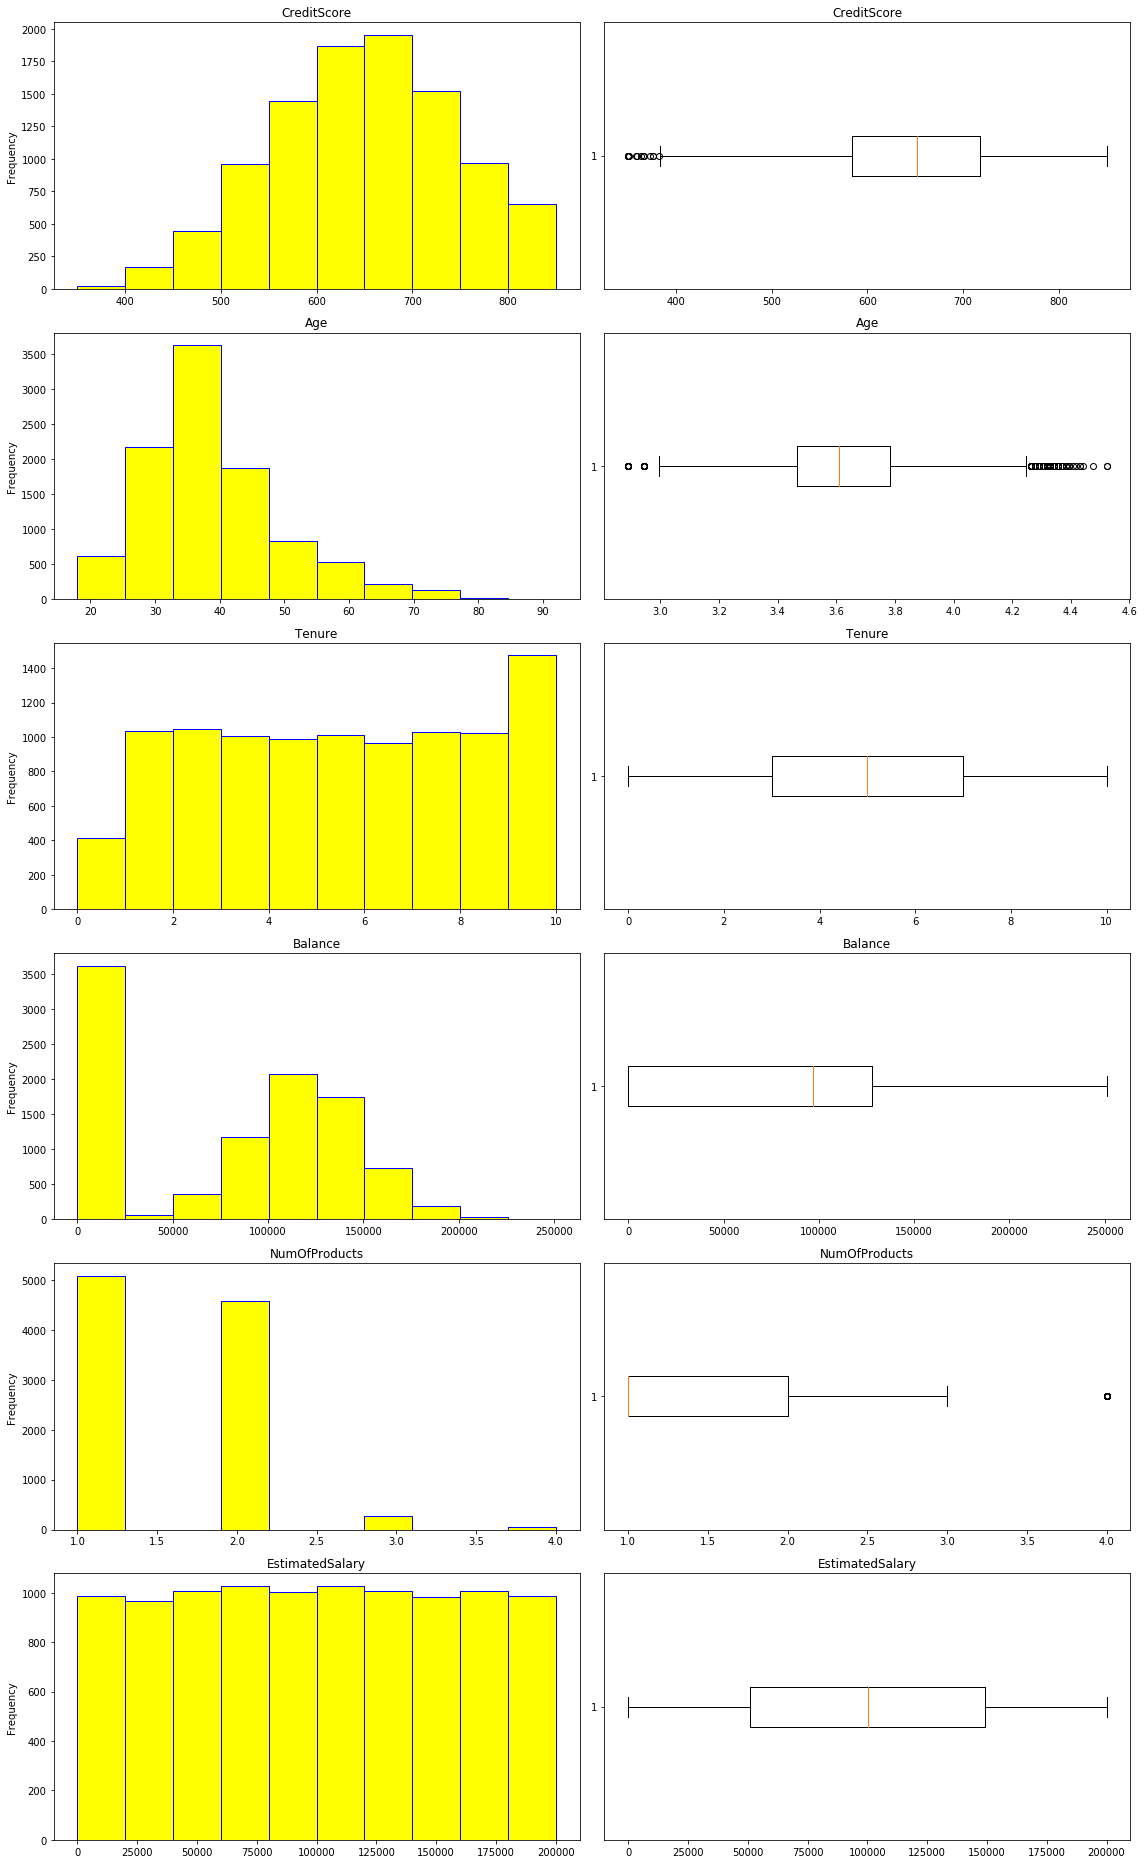

In [113]:
# Histogram for 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
fig, axs = plt.subplots(6,2,  figsize=(16,26), tight_layout=True )

# Credit Score 
axs[0,0].hist(df.CreditScore, color = "Yellow", edgecolor= "blue")
axs[0,0].set_title('CreditScore')
axs[0,0].set_ylabel('Frequency')

axs[0,1].boxplot(df.CreditScore, vert=False)
axs[0,1].set_title('CreditScore')

# Age
# Took Log of age for Normal bell shaped curve
axs[1,0].hist(df.Age, color = "Yellow", edgecolor= "blue")
axs[1,0].set_title('Age')
axs[1,0].set_ylabel('Frequency')

axs[1,1].boxplot(np.log(df.Age), vert=False)
axs[1,1].set_title('Age')

# Tenure
axs[2,0].hist(df.Tenure, color = "Yellow", edgecolor= "blue")
axs[2,0].set_title('Tenure')
axs[2,0].set_ylabel('Frequency')

axs[2,1].boxplot(df.Tenure, vert=False)
axs[2,1].set_title('Tenure')

# Balance
axs[3,0].hist(df.Balance, color = "Yellow", edgecolor= "blue")
axs[3,0].set_title('Balance')
axs[3,0].set_ylabel('Frequency')

axs[3,1].boxplot(df.Balance, vert=False)
axs[3,1].set_title('Balance')

# Num of Product
axs[4,0].hist(df.NumOfProducts, color = "Yellow", edgecolor= "blue")
axs[4,0].set_title('NumOfProducts')
axs[4,0].set_ylabel('Frequency')

axs[4,1].boxplot(df.NumOfProducts, vert=False)
axs[4,1].set_title('NumOfProducts')

# Estimated salary
axs[5,0].hist(df.EstimatedSalary, color = "Yellow", edgecolor= "blue")
axs[5,0].set_title('EstimatedSalary')
axs[5,0].set_ylabel('Frequency')

axs[5,1].boxplot(df.EstimatedSalary, vert=False)
axs[5,1].set_title('EstimatedSalary')

In [114]:
# Tenure and Estimated Salary are uniformly distributed 

### BIvariate Analysis

Text(0, 0.5, 'EstimatedSalary')

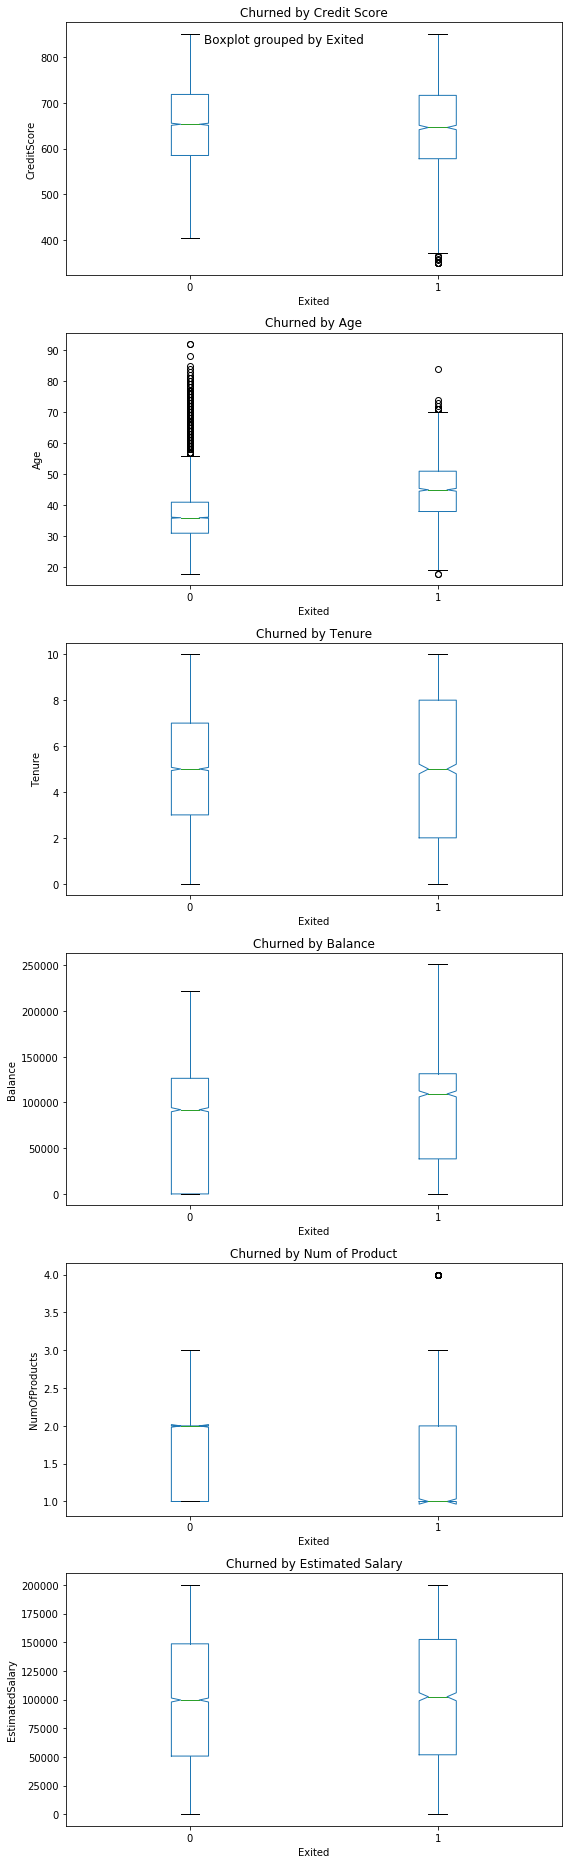

In [115]:
# Box-Plot For Cont. Numerical Variable 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
fig, axs = plt.subplots(6,1,  figsize=(8,26), tight_layout=True )

df.boxplot(column='CreditScore', notch=True, by='Exited', grid=False, ax=axs[0])
axs[0].set_title('Churned by Credit Score')
axs[0].set_ylabel('CreditScore')

df.boxplot(column='Age', notch=True, by='Exited', grid=False, ax=axs[1])
axs[1].set_title('Churned by Age')
axs[1].set_ylabel('Age')

df.boxplot(column='Tenure', notch=True, by='Exited', grid=False, ax=axs[2])
axs[2].set_title('Churned by Tenure')
axs[2].set_ylabel('Tenure')

df.boxplot(column='Balance', notch=True, by='Exited', grid=False, ax=axs[3])
axs[3].set_title('Churned by Balance')
axs[3].set_ylabel('Balance')

df.boxplot(column='NumOfProducts', notch=True, by='Exited', grid=False, ax=axs[4])
axs[4].set_title('Churned by Num of Product')
axs[4].set_ylabel('NumOfProducts')

df.boxplot(column='EstimatedSalary', notch=True, by='Exited', grid=False, ax=axs[5])
axs[5].set_title('Churned by Estimated Salary')
axs[5].set_ylabel('EstimatedSalary')

In [116]:
# It is observed that Age and number of Product use by custermer are affecting churn rate more than other variable

In [117]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [118]:
['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

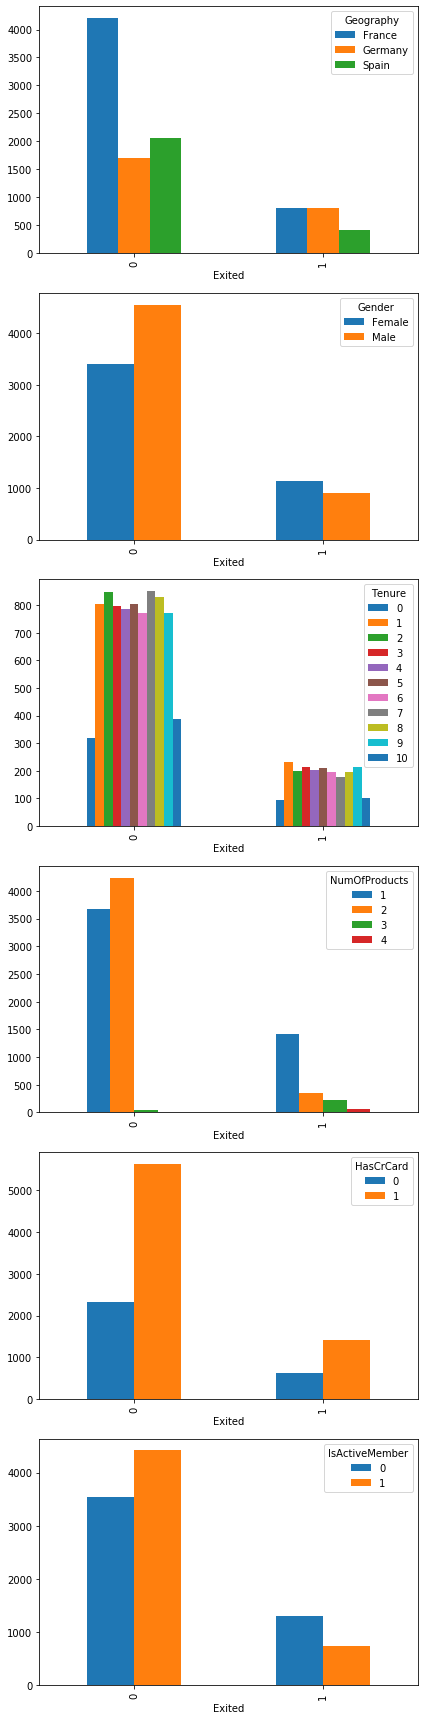

In [119]:
# Box-Plot For Cont. Numerical Variable 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
fig, axs = plt.subplots(6,1,  figsize=(6,24), tight_layout=True)

df1 = df.groupby(['Geography', 'Exited'])['Exited'].count().unstack('Geography')
df1.plot(kind='bar', stacked= False, ax= axs[0])

df1 = df.groupby(['Gender', 'Exited'])['Exited'].count().unstack('Gender')
df1.plot(kind='bar', stacked= False, ax= axs[1])

df1 = df.groupby(['Tenure', 'Exited'])['Exited'].count().unstack('Tenure')
df1.plot(kind='bar', stacked= False, ax= axs[2])

df1 = df.groupby(['NumOfProducts', 'Exited'])['Exited'].count().unstack('NumOfProducts')
df1.plot(kind='bar', stacked= False, ax= axs[3])

df1 = df.groupby(['HasCrCard', 'Exited'])['Exited'].count().unstack('HasCrCard')
df1.plot(kind='bar', stacked= False, ax= axs[4])

df1 = df.groupby(['IsActiveMember', 'Exited'])['Exited'].count().unstack('IsActiveMember')
df1.plot(kind='bar', stacked= False, ax= axs[5])

### Chi Sq Test

In [120]:
import scipy.stats as stats

In [121]:
cat_var = ['Geography', 'Gender', 'Tenure', 'NumOfProducts'
           ,'HasCrCard', 'IsActiveMember']

In [122]:
print('Chi Sq Test Results: ')
for col in cat_var:
    crosstab = pd.crosstab(df['Exited'], df[col])
    result = stats.chi2_contingency(crosstab)
    #print("\n\n--------------------Features--------")
    #print("CHIsq Test")
    print(col,': P_Value', result[1])
    #print(result)

Chi Sq Test Results: 
Geography : P_Value 3.830317605354266e-66
Gender : P_Value 2.2482100097131755e-26
Tenure : P_Value 0.17758462026413294
NumOfProducts : P_Value 0.0
HasCrCard : P_Value 0.49237236141554686
IsActiveMember : P_Value 8.785858269303703e-55


In [123]:
# it is observed that 'Hascrcard' is insignificant, 

In [124]:
## Droping 'Hascrcard' variable

In [125]:
df  = df.drop('HasCrCard', axis=1)

### T-test

In [126]:
num_var = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [127]:
print('T-Test Results: ')
for col in num_var:
    result = stats.ttest_ind(df[col], df['Exited'])
    print(col,': P_Value', result.pvalue)

T-Test Results: 
CreditScore : P_Value 0.0
Age : P_Value 0.0
Tenure : P_Value 0.0
Balance : P_Value 0.0
NumOfProducts : P_Value 0.0
EstimatedSalary : P_Value 0.0


### VIF Test

In [128]:
# Getting Numerical Columns
df_vif = df._get_numeric_data()
df_vif = df_vif.drop(['NumOfProducts'
                      , 'IsActiveMember', 'Exited'], axis = 1)

In [129]:
x = add_constant(df_vif)

In [130]:
print('VIF Test Results: ')
pd.Series([variance_inflation_factor(x.values, i)
          for i in range(x.shape[1])], index=x.columns)

VIF Test Results: 


const              67.660814
CreditScore         1.000060
Age                 1.000969
Tenure              1.000306
Balance             1.001159
EstimatedSalary     1.000285
dtype: float64

In [131]:
# No Multicolinearity has been Observed

### Label Encoding

In [132]:
str_col = ['Geography', 'Gender']

In [133]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [134]:
df.head(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1

In [135]:
LE = LabelEncoder()
for col in str_col:
    df[col] = LE.fit_transform(df[col])

In [136]:
df.head(3)

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1

### Spliting Data into Train and Test

In [137]:
Label = df[['Exited']]

In [138]:
features = df.drop(['Exited'], axis=1)

In [139]:
features

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      IsActiveMember  EstimatedSalary  
0                  1        101348.88  
1                  1        112542.58  
2                  0        113931.57  
3                  0         93826.63  
4                  1         79084.10  
...              ...              ...  
9995               0         96270.64  
9996               1        101699.77  
9997               1         42085.58  
9998               0         92888.52  
9999               0         38190.78  

[10000 rows x 9 columns]

In [140]:
#features = features[['CreditScore', 'Age', 'Tenure',
                     #'NumOfProducts', 'HasCrCard', 'IsActiveMember']]

In [141]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [142]:
## Creating train Test Split

In [143]:
x_train, x_test, y_train, y_test = train_test_split(features, Label, test_size=0.20, random_state=1)

In [144]:
print((x_train.shape, x_test.shape, y_train.shape, y_test.shape))

((8000, 9), (2000, 9), (8000, 1), (2000, 1))


### Model Performance Evaluation

In [146]:
def model_performance(x_train, y_train, x_test, y_test, model):
    RF_training_labels = model.predict(x_train)
    RF_test_labels = model.predict(x_test)
    
    rf_cm_tr = confusion_matrix(y_train, RF_training_labels)
    rf_cm_te = confusion_matrix(y_test, RF_test_labels)
    
    print('---------------------Training---------------------')
    print(classification_report(y_train, RF_training_labels))
    print('---------------------Test---------------------')
    print(classification_report(y_test, RF_test_labels))

    #Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(rf_cm_te), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Test Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    
    
    return RF_training_labels, RF_test_labels

## Model 1: Logistic Regression

---------------------Training---------------------
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      6378
           1       0.41      0.05      0.10      1622

    accuracy                           0.79      8000
   macro avg       0.61      0.52      0.49      8000
weighted avg       0.72      0.79      0.72      8000

---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1585
           1       0.35      0.04      0.07       415

    accuracy                           0.79      2000
   macro avg       0.58      0.51      0.48      2000
weighted avg       0.70      0.79      0.71      2000



C:\Users\91892\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

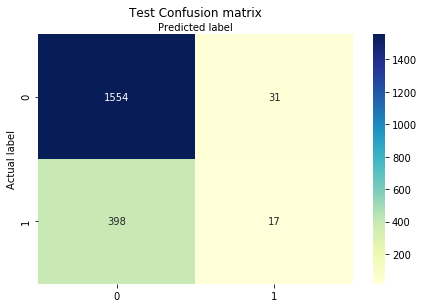

In [147]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
log_reg = logreg.fit(x_train, y_train)


#y_pred=log_reg.predict(x_test)

model_performance(x_train, y_train, x_test, y_test, log_reg)

In [148]:
# AUROC CURVE

In [149]:
from sklearn import metrics

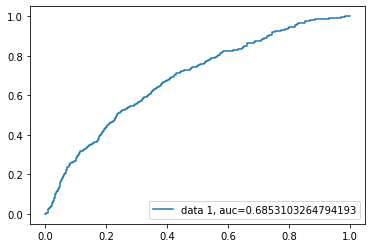

In [150]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Metrics
* Test:
    * Precission: 0.35
    * Recall: 0.04
    * f1 Score: 0.07
    * Accuracy: 0.79
    * AUROC: 0.68

* ........ Pred
* .........1   0
* ... 1   TP  FN
* ....0   FP  TN

## Model 2:  Decission Tree Classifier

In [151]:
from sklearn.tree import DecisionTreeClassifier

#### Selecting best Max_depth

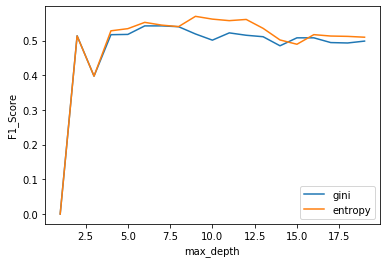

In [152]:
from sklearn.metrics import accuracy_score, f1_score
max_depth = []
acc_gini = []
acc_entropy = []


for i in range(1,20):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(f1_score(y_test, pred))
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(f1_score(y_test, pred))
    ####
    max_depth.append(i)
    
    
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
'acc_entropy':pd.Series(acc_entropy),
'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('F1_Score')
plt.legend()

In [153]:
# Criterion entropy and Max_depth 10 is giving best F1_Score

#### Selecting Best min samples Leaf

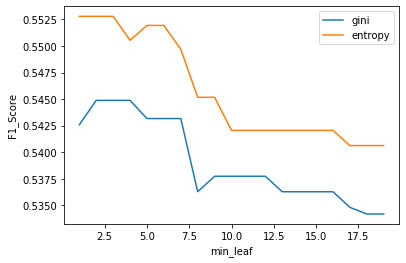

In [154]:
min_leaf = []
acc_gini = []
acc_entropy = []


for i in range(1,20):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(f1_score(y_test, pred))
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(f1_score(y_test, pred))
    ####
    min_leaf.append(i)
    
    
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
'acc_entropy':pd.Series(acc_entropy),
'min_leaf':pd.Series(min_leaf)})

# visualizing changes in parameters
plt.plot('min_leaf','acc_gini', data=d, label='gini')
plt.plot('min_leaf','acc_entropy', data=d, label='entropy')
plt.xlabel('min_leaf')
plt.ylabel('F1_Score')
plt.legend()

In [155]:
# Criterion entropy and Min_leaf 3 is giving best F1_Score

In [156]:
## Evaluating Model Performance

In [157]:

clf_gini = DecisionTreeClassifier(criterion='entropy', random_state=100, 
                                  max_depth= 10, min_samples_leaf= 3)

clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

---------------------Training---------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6378
           1       0.82      0.57      0.67      1622

    accuracy                           0.89      8000
   macro avg       0.86      0.77      0.80      8000
weighted avg       0.88      0.89      0.88      8000

---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1585
           1       0.70      0.49      0.57       415

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



(array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64))

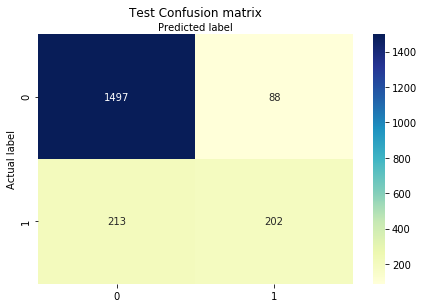

In [158]:
model_performance(x_train, y_train, x_test, y_test, clf_gini)

In [159]:
## AUROC Curve

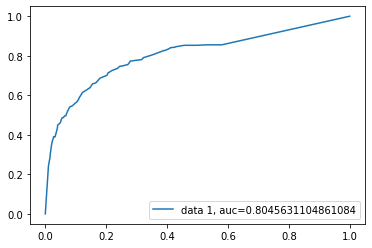

In [160]:
y_pred_proba = clf_gini.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Metrics
* Test:
    * Precission: 0.70
    * Recall: 0.49
    * f1 Score: 0.58
    * Accuracy: 0.85
    * AUROC: 0.80

### Creating Tree graph

In [161]:
data_feature_name = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']

In [163]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = data_feature_name, class_names=['Exited','Not Exited'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Churn_customer.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.933719 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.933719 to fit



In [164]:
print('Original Tree Leaf :', sum(clf_gini.tree_.children_left < 0))

Original Tree Leaf : 293


## Model 3: Pruned Tree to improve model performance

In [165]:
from sklearn.tree._tree import TREE_LEAF

In [166]:


def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print('Original Tree Leaf :', sum(clf_gini.tree_.children_left < 0))

# start pruning from the root
prune_index(clf_gini.tree_, 0, 5)
print('Pruned tree leaf: ', sum(clf_gini.tree_.children_left < 0))


Original Tree Leaf : 293
Pruned tree leaf:  349


In [167]:
## Re-Evaluating Model

---------------------Training---------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6378
           1       0.81      0.57      0.66      1622

    accuracy                           0.88      8000
   macro avg       0.85      0.77      0.80      8000
weighted avg       0.88      0.88      0.88      8000

---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1585
           1       0.71      0.50      0.59       415

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000



(array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64))

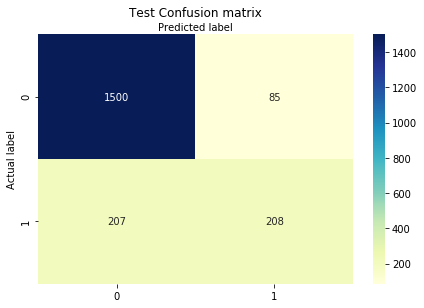

In [168]:
model_performance(x_train, y_train, x_test, y_test, clf_gini)

In [169]:
## AUROC Curve

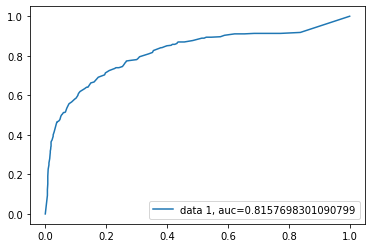

In [170]:
y_pred_proba = clf_gini.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Metrics
* Test:
    * Precission: 0.71
    * Recall: 0.50
    * f1 Score: 0.59
    * Accuracy: 0.85
    * AUROC: 0.81

In [171]:
### Plotting Tree

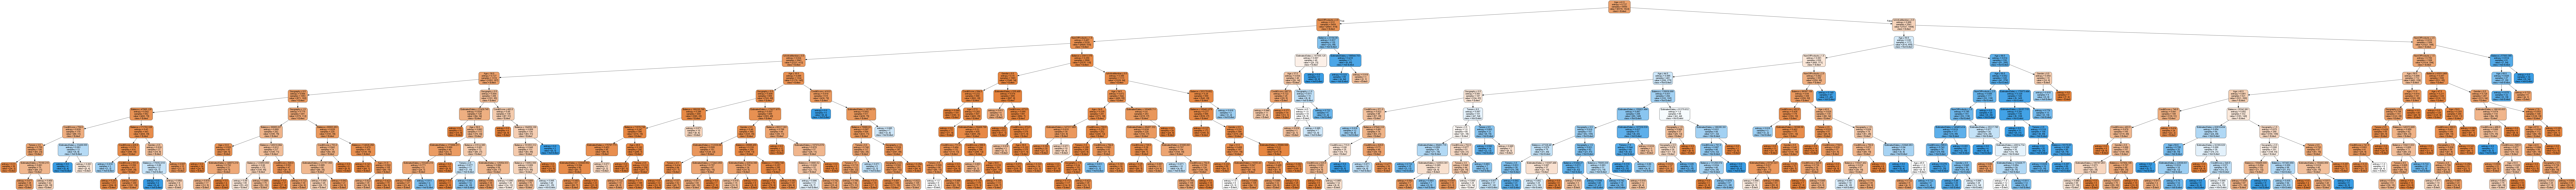

In [172]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = data_feature_name, class_names=['Exited','Not Exited'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Churn_customer_Pruned.png')
Image(graph.create_png())

## Model 4: Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
R_forst = RandomForestClassifier(n_estimators=50, max_features=0.5,
            oob_score=True, criterion='entropy')

In [175]:
R_forst.fit(x_train, y_train)

C:\Users\91892\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [176]:
pred = R_forst.predict(x_test)

In [177]:
R_forst.feature_importances_

array([0.15540217, 0.03730389, 0.02160471, 0.22780573, 0.08499759,
       0.15346529, 0.12204038, 0.03786803, 0.15951221])

In [178]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [179]:
R_forst.oob_score_

0.854125

---------------------Training---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6378
           1       1.00      1.00      1.00      1622

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

---------------------Test---------------------
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.77      0.46      0.57       415

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



(array([0, 0, 1, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64))

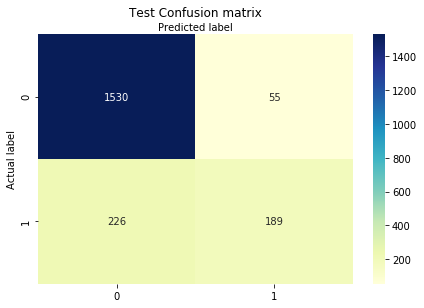

In [180]:
model_performance(x_train, y_train, x_test, y_test, R_forst)

In [181]:
## AUROC Curve

In [182]:
y_pred_proba = R_forst.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Metrics
* Test:
    * Precission: 0.79
    * Recall: 0.46
    * f1 Score: 0.58
    * Accuracy: 0.86
    * AUROC: 0.85

## Concluson

* Best Model:
* Model 4: Pruned Decision Tree:

* Actual Churner classified as Churner are 208.
* Actual Churner classified as non-churner are 207.
* Actual non-churner classified as non-churner are 1500.
* Actual non-churner classified as churner are 85.


* In conclusion, we have observed that predicting customer churned is a challenging task due to customer temporal behavorial characteristic, which increases the overall data analysis complexity. In fact, a standard procedure to model time events in classification tasks does not exists yet, However, we have proved that data ML tools can help banks to understand their customers' behavior helps in reducing costs to acquire new customers by spending some amount to retain current customers 
